In [1]:
%run ./'01 load.ipynb'

In [3]:
df['date_string'] = df['date'].dt.strftime('%d. %b')
df = df[df['date'] > date_start]

In [4]:
germany = df[df['country'] == 'Germany']
italy = df[df['country'] == 'Italy']

In [5]:
germany['new'] = germany['confirmed'].diff()
italy['new'] = italy['confirmed'].diff()

/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
germany['minus-9'] = germany['confirmed'].shift(-9)

/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


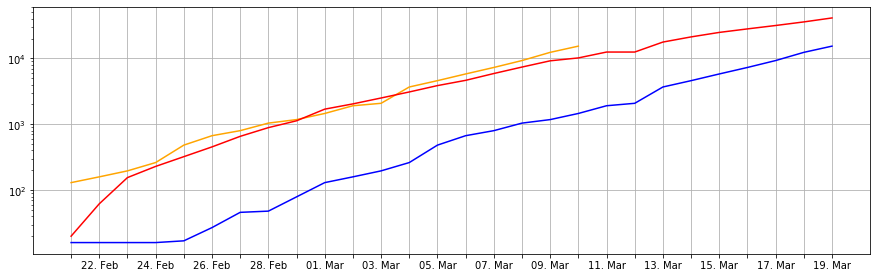

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker
format_y = matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
x = list(germany['date_string'])
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(germany['date_string'], germany['confirmed'], color='blue')
ax1.plot(germany['date_string'], germany['minus-9'], color='orange')
ax1.plot(italy['date_string'], italy['confirmed'], color='red')
ax1.grid(True)
ax1.set_yscale('log')
for label in ax1.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)